In [1]:
from tensorflow.keras.datasets import reuters
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Download the dataset and divided it into train(80%) and test data(20%)

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Print the number of train, test news, and categories with the first data set

In [4]:
print('train : {}'.format(len(x_train)))
print('test : {}'.format(len(x_test)))
#y_train starts with 0 in order
num_classes = max(y_train) + 1
print('categories : {}'.format(num_classes))

#data has been already tokenized
print(x_train[0])
print(y_train[0])

train : 8982
test : 2246
categories : 46
[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


The length of news is different, mostly has a length between 100 and 200.

News are mostly 3, 4 label

max len :2376
avg len :145.5398574927633


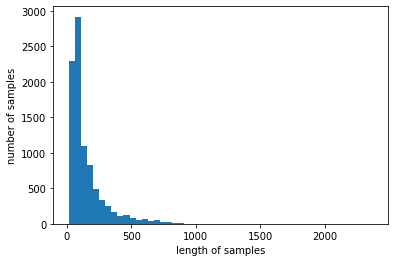

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


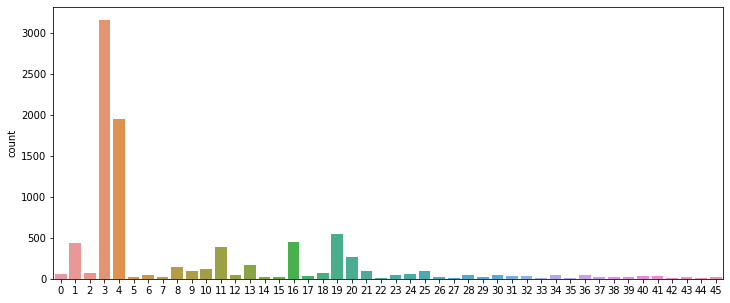

In [5]:
print('max len :{}'.format(max(len(l) for l in x_train)))
print('avg len :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

#check the distribution of the label and type of the news
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train)

In [11]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("Frequency for each label:")
print(np.asarray((unique_elements, counts_elements)))

word_to_index = reuters.get_word_index()
# print(word_to_index)

Frequency for each label:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


Convert the index to word

In [12]:
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value] = key

#word is 'nondiscriminatory'
print('28842th word : {}'.format(index_to_word[28842]))
#word is 'the'
print('1st word : {}'.format(index_to_word[1]))


for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

print(' '.join([index_to_word[index] for index in x_train[0]]))

28842th word : nondiscriminatory
1st word : the
<sos> wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs


Classify using LSTM

In [13]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional, BatchNormalization
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

Choose 1 - 1000 words

In [14]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


1. Padding: choose 100 as a max length

2. One-hot encoding

3. Embedding


In [15]:
max_len = 100
#Padding
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len) 

#One hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
#Embedding takes at least 2 arguments,
#The first argument is the size of the word set, and the second argument is the dimension of the embedding vector.
model = Sequential()
model.add(Embedding(1000, 240))
model.add(BatchNormalization())
#Put into the LSTM, The factor of LSTM is the size of the memory cell's hidden state (hidden_size).
model.add(LSTM(240))
# model.add(Dense(64, activation='swish'))
# model.add(Bidirectional(LSTM(64, return_sequences = True)))
# model.add(Bidirectional(LSTM(64, return_sequences = False)))

#Need to classify 46 categories
model.add(Dense(46, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 240)         240000    
_________________________________________________________________
batch_normalization (BatchNo (None, None, 240)         960       
_________________________________________________________________
lstm (LSTM)                  (None, 240)               461760    
_________________________________________________________________
dense (Dense)                (None, 46)                11086     
Total params: 713,806
Trainable params: 713,326
Non-trainable params: 480
_________________________________________________________________


If the loss is increasing, it can be overfitted. So when the data loss occurs over 4 times, stop learning.

Using model checkpoint to save the model when the performance is better than before


In [17]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

#The accuracy is 73.11%.
history = model.fit(x_train, y_train, batch_size=128, epochs=30, callbacks=[es, mc], validation_data=(x_test, y_test))

Epoch 1/30
71/71 [==============================] - 53s 716ms/step - loss: 1.9729 - acc: 0.5130 - val_loss: 3.2849 - val_acc: 0.3206

Epoch 00001: val_acc improved from -inf to 0.32057, saving model to best_model.h5
Epoch 2/30
71/71 [==============================] - 50s 708ms/step - loss: 1.3852 - acc: 0.6572 - val_loss: 3.4332 - val_acc: 0.1794

Epoch 00002: val_acc did not improve from 0.32057
Epoch 3/30
71/71 [==============================] - 50s 705ms/step - loss: 1.0674 - acc: 0.7354 - val_loss: 2.2549 - val_acc: 0.5249

Epoch 00003: val_acc improved from 0.32057 to 0.52493, saving model to best_model.h5
Epoch 4/30
71/71 [==============================] - 50s 709ms/step - loss: 0.8075 - acc: 0.7948 - val_loss: 2.5252 - val_acc: 0.4599

Epoch 00004: val_acc did not improve from 0.52493
Epoch 5/30
71/71 [==============================] - 50s 711ms/step - loss: 0.6019 - acc: 0.8471 - val_loss: 1.8195 - val_acc: 0.5788

Epoch 00005: val_acc improved from 0.52493 to 0.57881, saving m

In [18]:
#Evaluate the model performance.
loaded_model = load_model('best_model.h5')
print("\n accuracy: %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))

71/71 [==============================] - 6s 78ms/step - loss: 1.4111 - acc: 0.7369

 accuracy: 0.7369


Generally, shows decreasing trends. However, at some point the decrease of the loss is flatten

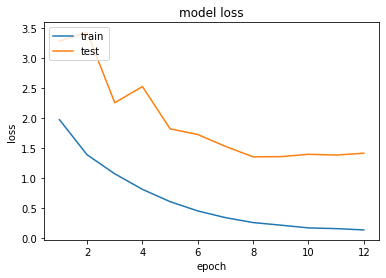

In [19]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()